# MADDPG


## Implementation

The Multi Agent DDPG [(notes)](https://paperswithcode.com/method/maddpg) extends the Deep Deterministic Policy Gradient [(notes)](https://paperswithcode.com/method/ddpg) when using multi agents. 
The policy comes with two neural networks, one to model the action to be taken and one to estimate the value of a given state/action pair. The two networks can share some common layers if needed.
For the learning, two target networks are also used.

### Learning algorithm

The deep neural network Actor is used to predict the best actions for a given state.
The deep neural network Critic is used to predict the return for a given state when taking a given action.

Training directly the policy is not an easy task and it can lead to instability. 

DDPG offers some techniques to help reducing this problem.

- Using a memory history of previous experience (rollout). The learning happens on a shuffled memory, this helps breaking the correlation between a sequence of steps/ recent steps. Hence the agent learns a more generic behavior.

- Use two networks, once for the training and driving the action and one for the value.  This further reduce the correlation between action and sequence, plus reduces the so called "moving target" problem. 

- Target networks are softly updated, this further reduces the issue of the "moving target".

It also offers some key point to leverage speed up:

- Reuse the same memory multiple times.

- Traing and rollout are separate, we can hence massively parallelize the rollouts.


Note, for continuous action, for continuous actions the actor network is not returning the actual action for the envinronment. 

It is returning the "mean" value, we then use a Gaussian distribution with a given standard deviation to the sample the actual action. This is mainly done for exploration. The noise is slowly reduced during the training.



#### Hyperparameters
For calculating expected return
- GAMMA: 0.99

For adam optimizer and target update:
- LR:  2e-4
- TAU: 1e-3

For noise:
- std_start:  0.15
- std_end:    0.05
- std_decay:  1.0-1.0e-4

For memory rollout, batch and update frequency:
- BUFFER_SIZE: 1e5
- BATCH_SIZE:  64*2*2
- UPDATE_EVERY: 1



#### Model architecture

The critic network is composed of 3 fully connected layers, with relu activation functions:
- (24+2)x64 
- Relu
- 64x64
- Relu
- 64x1

The actor network is composed of 3 fully connected layers with relu activation function, plus a final Tanh to final value is applied:
- 24x64
- Relu
- 64x64
- Relu
- 64x2
- Tanh

## Result

The agent is able to achieve the required performance after 3403 episodes.





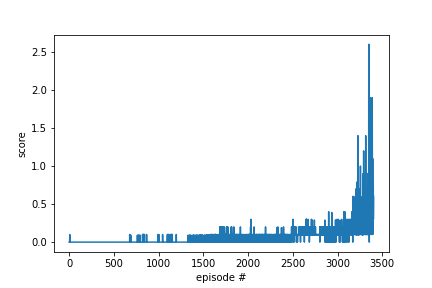

## Possible Improvements
It is possible to further improve the the algorithm by implementing additional features:
- "investigate parameters", changing parameters to speed up the optimization
- "noise", we used a simple gaussian distribution, there are alternatives we can use.
- "exploit memory", we randomly sample the memory, but we should prioritize good memory.
- "alternative approaches like PPO".
